# Exercise 1

In [2]:
import numpy as np

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical   
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers.core import Dropout
from keras import regularizers
from keras.optimizers import SGD,Adam
import matplotlib.pyplot as plt





(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 34s 0us/step


In [0]:
# ## zero -center

# mean = np.mean(X_train,axis=(0,1,2,3))
# std = np.std(X_train,axis=(0,1,2,3))
# X_train = (X_train-mean)/(std+1e-7)
# X_test = (X_test-mean)/(std+1e-7)



# Data pre-processing

In [3]:
# Transform label indices to one-hot encoded vectors

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Transform images from (32,32,3) to 3072-dimensional vectors (32*32*3)

X_train = np.reshape(X_train,(50000,3072))
X_test = np.reshape(X_test,(10000,3072))
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')




# Normalization of pixel values (to [0-1] range)

X_train /= 255
X_test /= 255

print(X_test.shape , y_test.shape)

(10000, 3072) (10000, 10)


# Depth and width of network

model: [1024, 512, 512]
-----------------------------------------------START MODEL----------------------------------------------------------
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_13 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 255us/step 

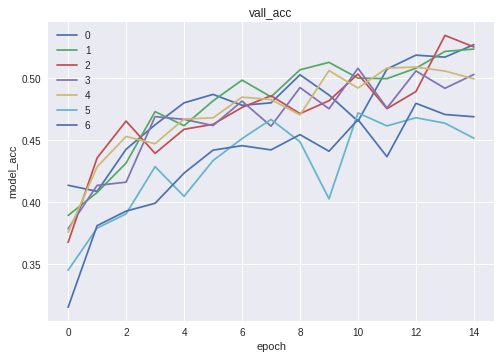

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD,Adam
#Using Relu as activation layer and SGD to determine the best width-depth , with 'default' activation function

##based on SOTA , I have tried to determine the Width and Depth of my network with relu and softmax
total_scores= list()
epoch =15
batch_size = 32

for i in [[1024,512,512],[1024,600],[1024,512,128],[256,256],[512,512],[60,30],[60,30,20]]:
    print('model:',i)
    print('-----------------------------------------------START MODEL----------------------------------------------------------')


    model = Sequential()
    model.add(Dense(i[0], activation='relu', input_dim=3072))
    for j in i[1:]:
        model.add(Dense(j, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.summary()
    #sgd = 

    model.compile(optimizer=SGD(),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(X_train,y_train, epochs=15, batch_size=32, verbose=1, validation_split=0.2, validation_data=(X_test, y_test))


    score = model.evaluate(X_test, y_test, verbose=0)
    total_scores.append([score[0],score[1]])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    print('-----------------------------------------------END OF MODEL----------------------------------------------------------')

    
    plt.plot(history.history['val_acc'])
#plt.figure(figsize=(20,10))      
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['0','1', '2', '3', '4', '5', '6'], loc='upper left')
plt.show()



# Choice of activation and loss functions

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 15s 306us/step - loss: 2.3091 - acc: 0.1058 - val_loss: 2.2961 - val_acc: 0.1222
Epoch 2/15
50000/50000 [==============================] - 13s 257us/step - loss: 2.2883 - acc: 0.1275 - val_loss: 2.2687 - val_acc: 0.1548
Epoch 3/15
50000/50000 [==============================] - 13s 255us/step - loss: 2.2364 - acc: 0.1649 - val_loss: 2.1873 - val_acc: 0.2089
Epoch 4/15
50000/50000 [==============================] - 13s 256us/step - loss: 2.1393 - acc: 0.1932 - val_loss: 2.0983 - val_acc: 0.2210
Epoch 5/15
50000/50000 [==============================] - 13s 255us/step - loss: 2.0741 - acc: 0.2200 - val_loss: 2.0569 - val_acc: 0.2484
Epoch 6/15
50000/50000 [==============================] - 13s 258us/step - loss: 2.0326 - acc: 0.2455 - val_loss: 2.0147 - val_acc: 0.2319
Epoch 7/15
50000/50000 [==============================] - 13s 257us/step - loss: 1.9972 - acc: 0.2648 - val_loss: 1.

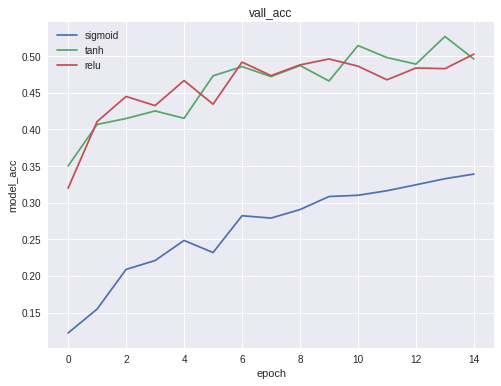

In [16]:
scores_functions = []
for activation in ['sigmoid', 'tanh', 'relu']:
    model1 = Sequential()
    model1.add(Dense(1024, activation=activation, input_dim=3072))
    model1.add(Dense(512, activation=activation))
    model1.add(Dense(512, activation=activation))
    model1.add(Dense(10, activation='softmax'))
    model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
    history = model1.fit(X_train,y_train,
                    batch_size=32,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test, y_test))
    
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    scores_functions.append([score1[0],score1[1]])
    print('Test loss:', score1[0])
    print('Test accuracy:', score1[1])
    plt.plot(history.history['val_acc'])
#plt.figure(figsize=(20,10))     
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['sigmoid', 'tanh', 'relu'], loc='upper left')
plt.show()

# Regularisations

FOR DROP RATE: 0.2
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 17s 338us/step - loss: 1.9410 - acc: 0.2962 - val_loss: 1.7596 - val_acc: 0.3615
Epoch 2/15
50000/50000 [==============================] - 14s 274us/step - loss: 1.7543 - acc: 0.3698 - val_loss: 1.7070 - val_acc: 0.3929
Epoch 3/15
50000/50000 [==============================] - 14s 275us/step - loss: 1.6839 - acc: 0.3999 - val_loss: 1.6553 - val_acc: 0.4009
Epoch 4/15
50000/50000 [==============================] - 14s 273us/step - loss: 1.6247 - acc: 0.4214 - val_loss: 1.5259 - val_acc: 0.4573
Epoch 5/15
50000/50000 [==============================] - 14s 274us/step - loss: 1.5860 - acc: 0.4368 - val_loss: 1.5019 - val_acc: 0.4627
Epoch 6/15
50000/50000 [==============================] - 14s 274us/step - loss: 1.5487 - acc: 0.4512 - val_loss: 1.4939 - val_acc: 0.4712
Epoch 7/15
50000/50000 [==============================] - 14s 274us/step - loss: 1.5168 - acc: 0.

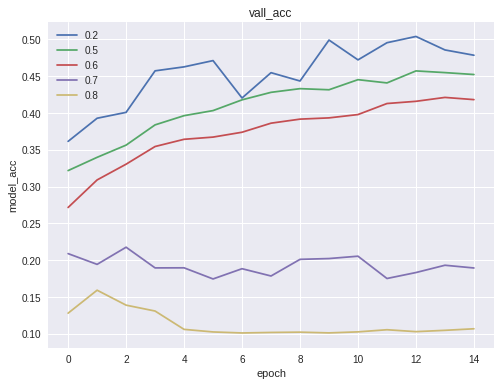

In [26]:
from keras.layers.core import Dropout


activation='relu'
dropout_rate = [0.2,0.5, 0.6, 0.7, 0.8]
scores_drop = []
for rate in dropout_rate:
    print('FOR DROP RATE:' ,rate)
    model2 = Sequential()
    model2.add(Dense(1024, activation='relu', input_dim=3072))
    model2.add(Dropout(rate))
    model2.add(Dense(512,activation='relu'))
    model2.add(Dropout(rate))
    model2.add(Dense(512,activation='relu'))
    model2.add(Dropout(rate))
    model2.add(Dense(10, activation='softmax'))
    model2.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
    history = model2.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(X_test, y_test))
    score = model2.evaluate(X_test, y_test, verbose=0)
    scores_drop.append([score[0],score[1]])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(history.history['val_acc'])
    
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['0.2','0.5', '0.6', '0.7','0.8','0.9'], loc='upper left')
plt.show()



FOR RATE: 0.01
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 254us/step - loss: 26.7591 - acc: 0.2142 - val_loss: 2.4989 - val_acc: 0.1748
Epoch 2/15
50000/50000 [==============================] - 12s 235us/step - loss: 2.4312 - acc: 0.2140 - val_loss: 2.4225 - val_acc: 0.2328
Epoch 3/15
50000/50000 [==============================] - 12s 234us/step - loss: 2.3513 - acc: 0.2534 - val_loss: 2.3123 - val_acc: 0.2632
Epoch 4/15
50000/50000 [==============================] - 12s 236us/step - loss: 2.3047 - acc: 0.2680 - val_loss: 2.3250 - val_acc: 0.2547
Epoch 5/15
50000/50000 [==============================] - 12s 233us/step - loss: 2.2797 - acc: 0.2838 - val_loss: 2.2762 - val_acc: 0.2792
Epoch 6/15
50000/50000 [==============================] - 12s 233us/step - loss: 2.2586 - acc: 0.3007 - val_loss: 2.2570 - val_acc: 0.3067
Epoch 7/15
50000/50000 [==============================] - 12s 233us/step - loss: 2.2292 - acc: 0.316

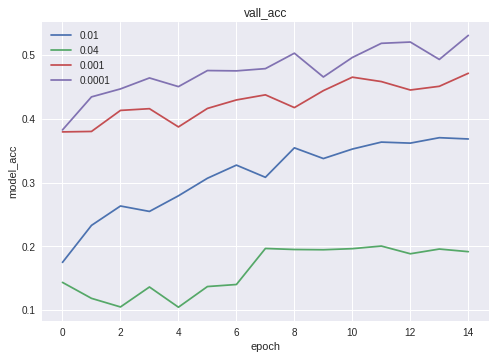

In [9]:
from keras.regularizers import l1,l2
#kernel_regularizer: Regularizer function applied to the kernel weights matrix (see regularizer)


l1_rate = [0.01,0.04,0.001,0.0001]
scores_l1= []
for rate in l1_rate:
    print('FOR RATE:',rate)
    modell = Sequential()
    modell.add(Dense(1024, activation='relu', input_dim=3072))
    modell.add(Dense(512,activation='relu',kernel_regularizer=l1(rate)))
    modell.add(Dense(512,activation='relu',kernel_regularizer=l1(rate)))
    modell.add(Dense(10, activation='softmax'))
    modell.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
    history = modell.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(X_test, y_test))
    score = modell.evaluate(X_test, y_test, verbose=0)
    scores_l1.append([score[0],score[1]])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(history.history['val_acc'])
    
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['0.01', '0.04', '0.001','0.0001'], loc='upper left')
plt.show()



FOR RATE: 0.01
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 13s 262us/step - loss: 7.4754 - acc: 0.3443 - val_loss: 5.8576 - val_acc: 0.3514
Epoch 2/15
50000/50000 [==============================] - 12s 240us/step - loss: 4.7103 - acc: 0.4095 - val_loss: 3.8854 - val_acc: 0.4023
Epoch 3/15
50000/50000 [==============================] - 12s 240us/step - loss: 3.2540 - acc: 0.4369 - val_loss: 2.8003 - val_acc: 0.4307
Epoch 4/15
50000/50000 [==============================] - 12s 242us/step - loss: 2.4670 - acc: 0.4525 - val_loss: 2.2406 - val_acc: 0.4341
Epoch 5/15
50000/50000 [==============================] - 12s 239us/step - loss: 2.0347 - acc: 0.4653 - val_loss: 1.9121 - val_acc: 0.4560
Epoch 6/15
50000/50000 [==============================] - 12s 239us/step - loss: 1.7899 - acc: 0.4776 - val_loss: 1.7876 - val_acc: 0.4425
Epoch 7/15
50000/50000 [==============================] - 12s 239us/step - loss: 1.6473 - acc: 0.4891

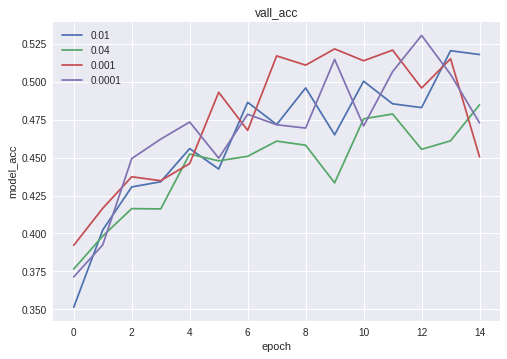

In [10]:
from keras import regularizers

from keras.regularizers import l1,l2


l2_rate = [0.01,0.04,0.001,0.0001]

scores_l2 = []
for rate in l2_rate:
    print('FOR RATE:',rate)
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_dim=3072))
    model.add(Dense(512,activation='relu',kernel_regularizer=l2(rate)))
    model.add(Dense(512,activation='relu',kernel_regularizer=l2(rate)))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
    history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epoch,
                    verbose=1,
                    validation_data=(X_test, y_test))
    score = model.evaluate(X_test, y_test, verbose=0)
    scores_l2.append([score[0],score[1]])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(history.history['val_acc'])
    
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['0.01', '0.04', '0.001','0.0001'], loc='upper left')
plt.show()




### Weights in neurons

Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 14s 287us/step - loss: 1.8482 - acc: 0.3395 - val_loss: 1.7266 - val_acc: 0.3960
Epoch 2/15
50000/50000 [==============================] - 12s 236us/step - loss: 1.6597 - acc: 0.4143 - val_loss: 1.5864 - val_acc: 0.4392
Epoch 3/15
50000/50000 [==============================] - 12s 235us/step - loss: 1.5763 - acc: 0.4433 - val_loss: 1.5363 - val_acc: 0.4557
Epoch 4/15
50000/50000 [==============================] - 12s 234us/step - loss: 1.5181 - acc: 0.4638 - val_loss: 1.5106 - val_acc: 0.4617
Epoch 5/15
50000/50000 [==============================] - 12s 232us/step - loss: 1.4690 - acc: 0.4823 - val_loss: 1.5384 - val_acc: 0.4551
Epoch 6/15
50000/50000 [==============================] - 12s 235us/step - loss: 1.4323 - acc: 0.4964 - val_loss: 1.4359 - val_acc: 0.4836
Epoch 7/15
50000/50000 [==============================] - 12s 235us/step - loss: 1.3923 - acc: 0.5102 - val_loss: 1.

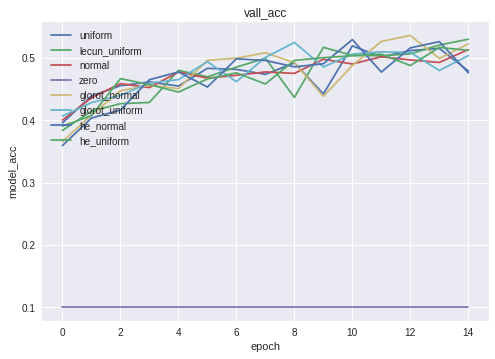

In [87]:
scores_functions = []
for init_mode in ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']:
    model1 = Sequential()
    model1.add(Dense(1024, activation=activation, input_dim=3072))
    model1.add(Dense(512, activation=activation,kernel_initializer=init_mode))
     model1.add(Dense(512, activation=activation,kernel_initializer=init_mode))
    model1.add(Dense(10, activation='softmax'))
    model1.compile(loss='categorical_crossentropy',
              optimizer=SGD(),
              metrics=['accuracy'])
    history = model1.fit(X_train,y_train,
                    batch_size=32,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test, y_test))
    
    score1 = model1.evaluate(X_test, y_test, verbose=0)
    scores_functions.append([score1[0],score1[1]])
    print('Test loss:', score1[0])
    print('Test accuracy:', score1[1])
    plt.plot(history.history['val_acc'])
    
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform'], loc='upper left')
plt.show()

# Choice of learning optimisers

OPTIMIZER: <keras.optimizers.SGD object at 0x7efd8736a2e8>
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 16s 328us/step - loss: 1.8470 - acc: 0.3398 - val_loss: 1.7581 - val_acc: 0.3676
Epoch 2/15
50000/50000 [==============================] - 13s 260us/step - loss: 1.6552 - acc: 0.4114 - val_loss: 1.6084 - val_acc: 0.4282
Epoch 3/15
50000/50000 [==============================] - 13s 261us/step - loss: 1.5693 - acc: 0.4436 - val_loss: 1.5777 - val_acc: 0.4429
Epoch 4/15
50000/50000 [==============================] - 13s 259us/step - loss: 1.5079 - acc: 0.4663 - val_loss: 1.6219 - val_acc: 0.4309
Epoch 5/15
50000/50000 [==============================] - 13s 258us/step - loss: 1.4583 - acc: 0.4818 - val_loss: 1.5172 - val_acc: 0.4530
Epoch 6/15
50000/50000 [==============================] - 13s 259us/step - loss: 1.4131 - acc: 0.4993 - val_loss: 1.5135 - val_acc: 0.4687
Epoch 7/15
50000/50000 [==============================] -

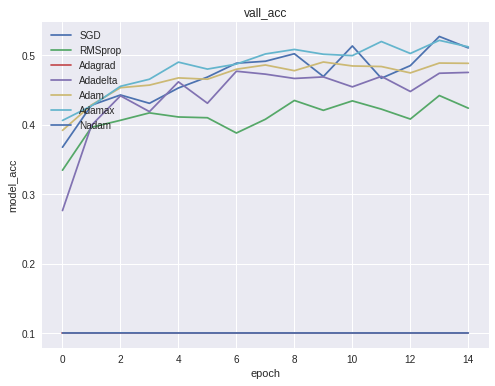

In [27]:
from keras.optimizers import SGD,RMSprop,Adagrad,Adadelta,Adam,Adamax,Nadam
from keras.models import Sequential


optimizer = [SGD(),RMSprop(), Adagrad(), Adadelta(), Adam(), Adamax(), Nadam()]
scores_functions = []
for opt in optimizer:
    print('OPTIMIZER:', opt)
    model = Sequential()
    model.add(Dense(1024, activation='relu', input_dim=3072))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(512, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
    history = model.fit(X_train,y_train,
                    batch_size=32,
                    epochs=15,
                    verbose=1,
                    validation_data=(X_test, y_test))
    
    score = model.evaluate(X_test, y_test, verbose=0)
    scores_functions.append([score[0],score[1]])
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])
    plt.plot(history.history['val_acc'])
    
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam'], loc='upper left')
plt.show()

## ** Hyper-parameters**

**See the learning rate in respect to learning rate  and epochs**

---
While take long time



batch: 32  epoch: 50 LEARN: 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_276 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_277 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_278 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_279 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 372us/step - loss: 2.0708 - acc: 0.2664 - val_loss: 1.9441 - val_acc: 0.3224
Epoch 2/50
50000/50000 [=================

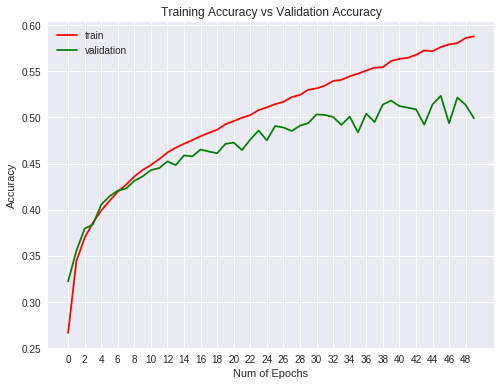

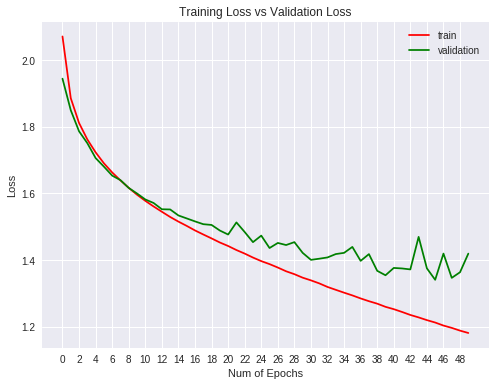

batch: 32  epoch: 50 LEARN: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_280 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_281 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_282 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_283 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.8510 - acc: 0.3369 - val_loss: 1.6876 - val_acc: 0.3975
Epoch 2/50
50000/50000 [==================

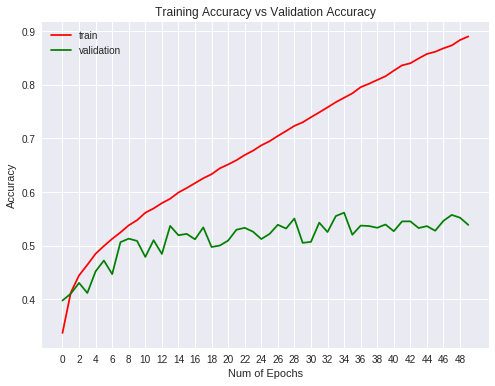

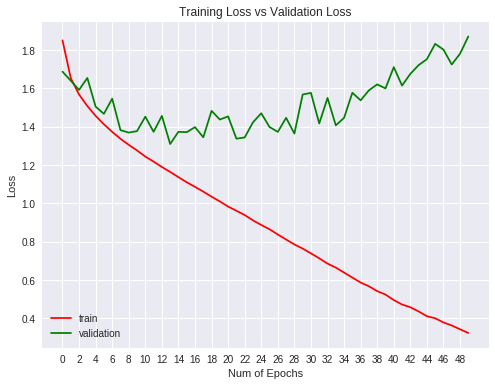

batch: 32  epoch: 50 LEARN: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_284 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_285 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_286 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_287 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 19s 372us/step - loss: 1.8949 - acc: 0.3095 - val_loss: 1.7762 - val_acc: 0.3636
Epoch 2/50
50000/50000 [===================

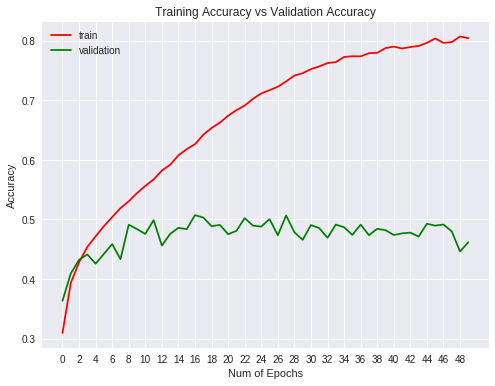

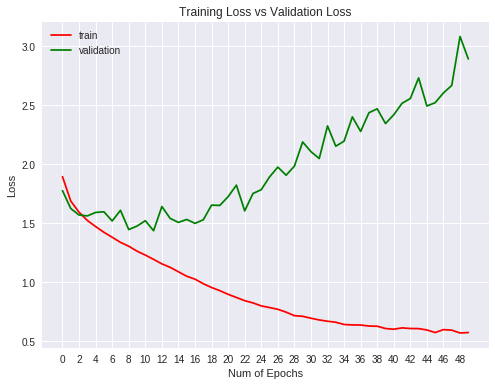

batch: 64  epoch: 50 LEARN: 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_288 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_289 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_290 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_291 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 12s 248us/step - loss: 2.1565 - acc: 0.2383 - val_loss: 2.0524 - val_acc: 0.2959
Epoch 2/50
50000/50000 [=================

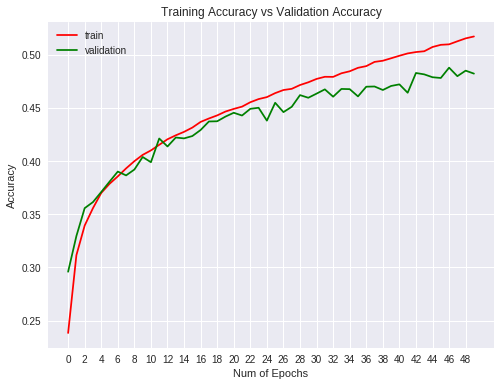

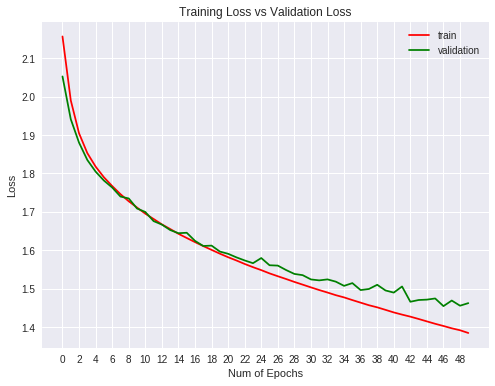

batch: 64  epoch: 50 LEARN: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_292 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_293 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_294 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_295 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 253us/step - loss: 1.9049 - acc: 0.3196 - val_loss: 1.8228 - val_acc: 0.3539
Epoch 2/50
50000/50000 [==================

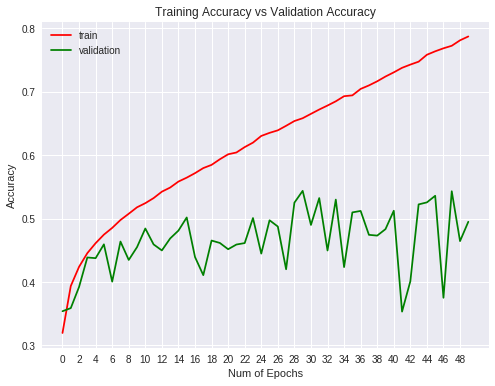

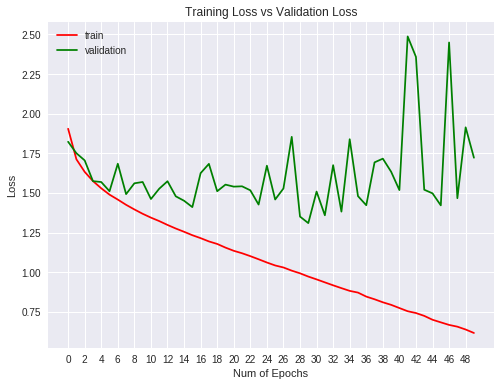

batch: 64  epoch: 50 LEARN: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_296 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_297 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_298 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_299 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 13s 250us/step - loss: 1.9071 - acc: 0.3072 - val_loss: 1.9692 - val_acc: 0.2961
Epoch 2/50
50000/50000 [===================

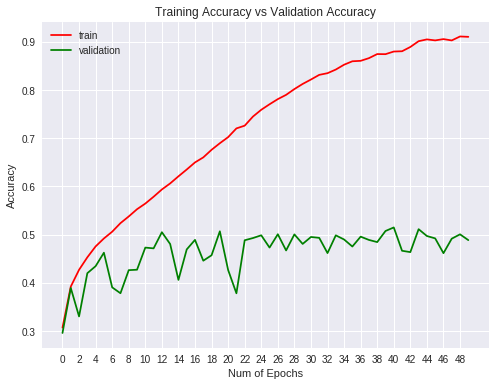

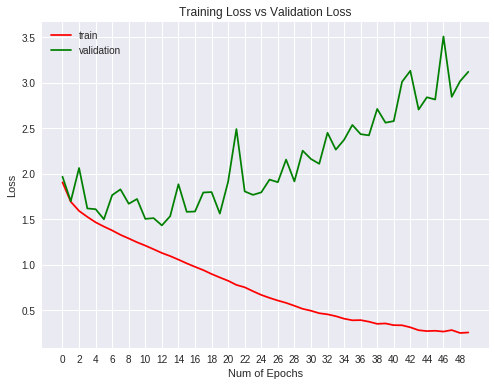

batch: 128  epoch: 50 LEARN: 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_300 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_301 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_302 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_303 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 197us/step - loss: 2.2301 - acc: 0.1858 - val_loss: 2.1503 - val_acc: 0.2494
Epoch 2/50
50000/50000 [================

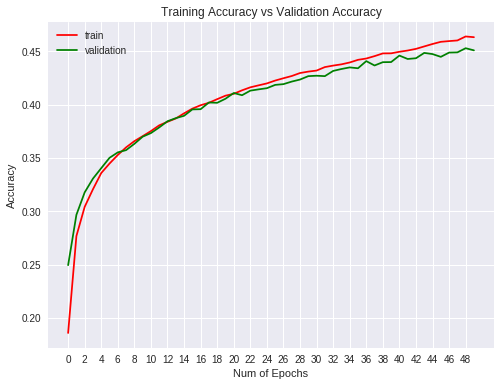

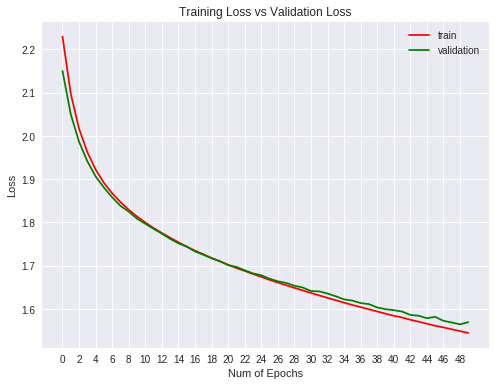

batch: 128  epoch: 50 LEARN: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_304 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_305 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_306 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_307 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 195us/step - loss: 1.9777 - acc: 0.2956 - val_loss: 1.8560 - val_acc: 0.3500
Epoch 2/50
50000/50000 [=================

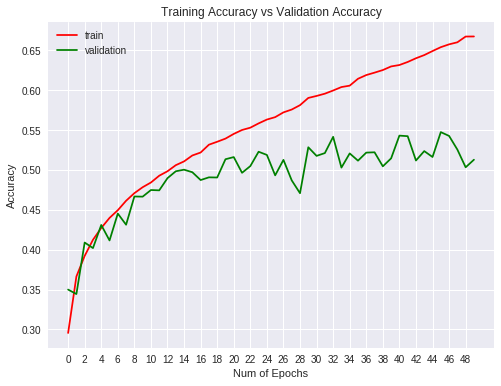

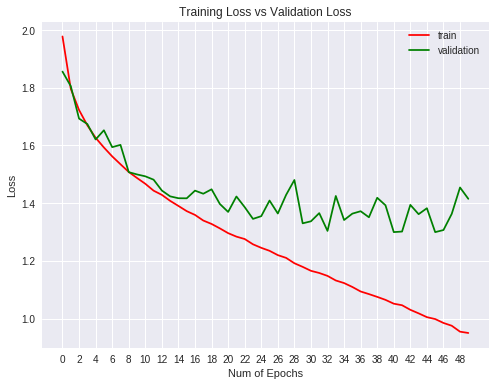

batch: 128  epoch: 50 LEARN: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_308 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_309 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_310 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_311 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 196us/step - loss: 1.9509 - acc: 0.2926 - val_loss: 1.7482 - val_acc: 0.3619
Epoch 2/50
50000/50000 [==================

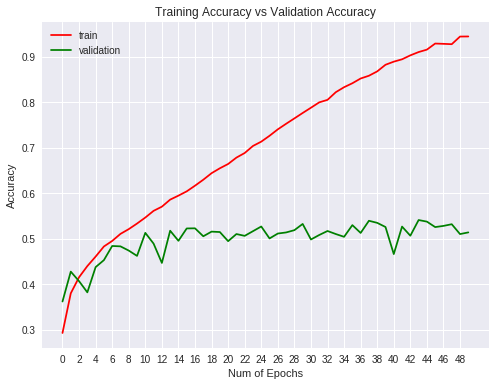

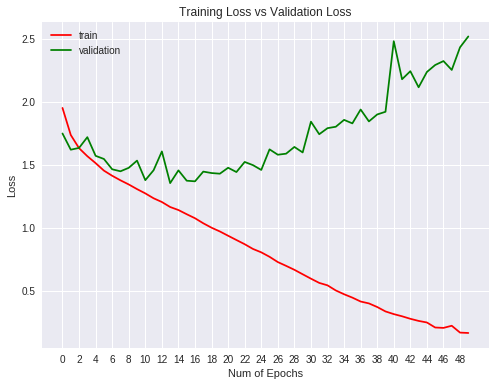

batch: 256  epoch: 50 LEARN: 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_312 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_313 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_314 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_315 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.2645 - acc: 0.1699 - val_loss: 2.2085 - val_acc: 0.2173
Epoch 2/50
50000/50000 [=================

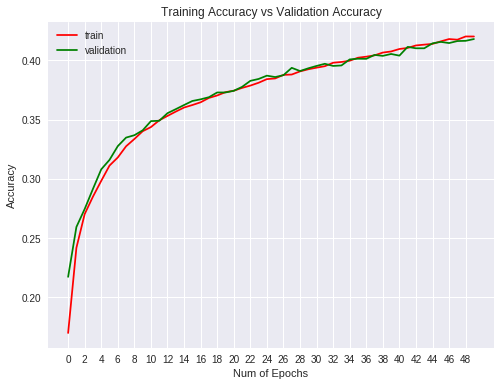

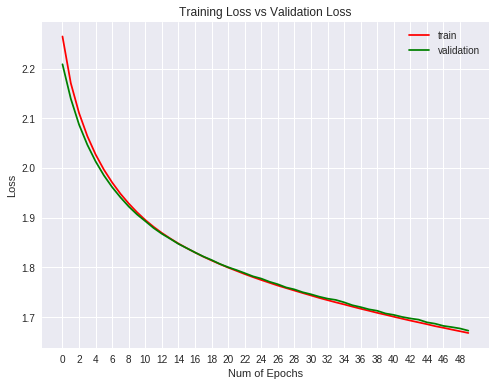

batch: 256  epoch: 50 LEARN: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_316 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_317 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_318 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_319 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 172us/step - loss: 2.0448 - acc: 0.2786 - val_loss: 1.9306 - val_acc: 0.3063
Epoch 2/50
50000/50000 [==================

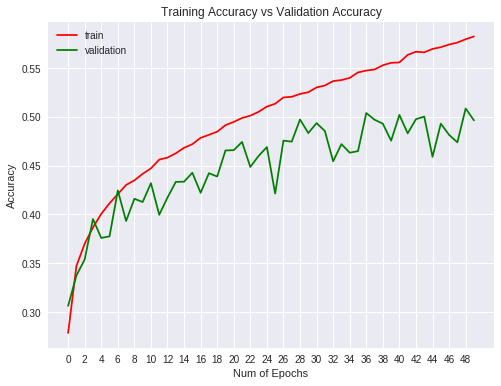

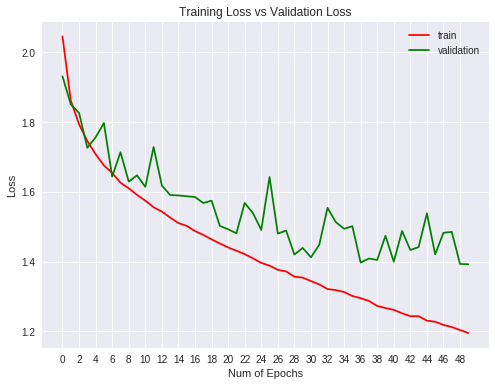

batch: 256  epoch: 50 LEARN: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_320 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_321 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_322 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_323 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.0081 - acc: 0.2724 - val_loss: 1.9911 - val_acc: 0.2683
Epoch 2/50
50000/50000 [===================

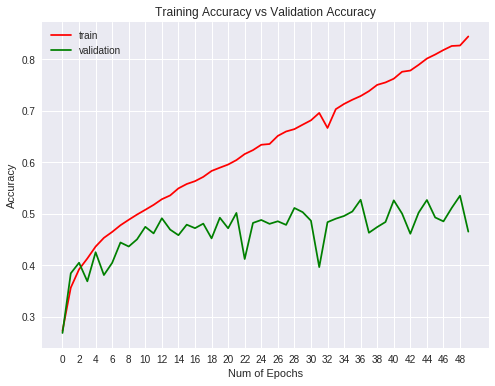

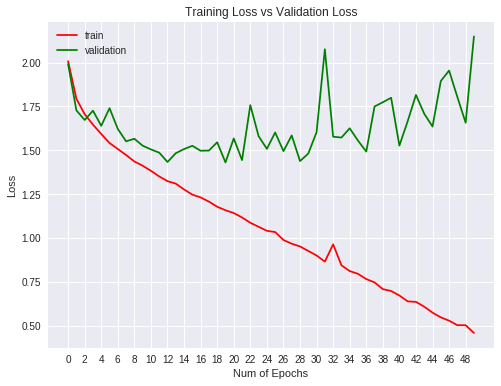

batch: 32  epoch: 100 LEARN: 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_324 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_325 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_326 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_327 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 392us/step - loss: 2.0717 - acc: 0.2737 - val_loss: 1.9489 - val_acc: 0.3138
Epoch 2/100
50000/50000 [==============

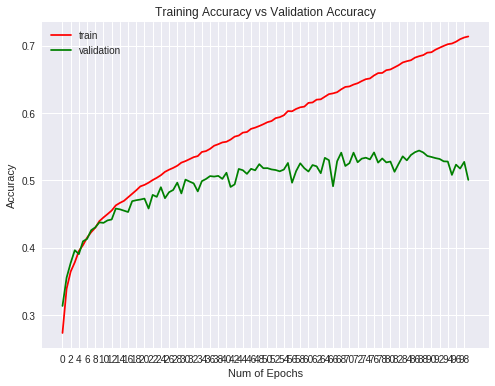

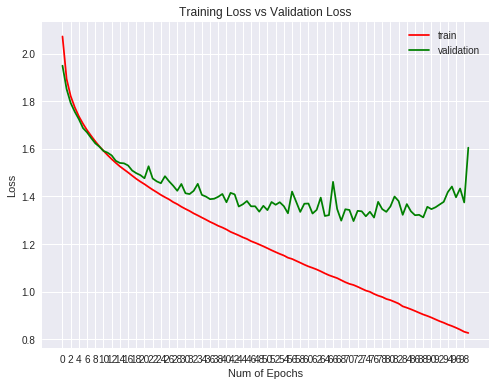

batch: 32  epoch: 100 LEARN: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_328 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_329 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_330 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_331 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 395us/step - loss: 1.8467 - acc: 0.3381 - val_loss: 1.7095 - val_acc: 0.3884
Epoch 2/100
50000/50000 [===============

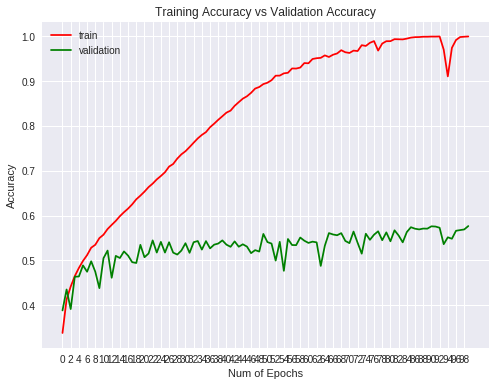

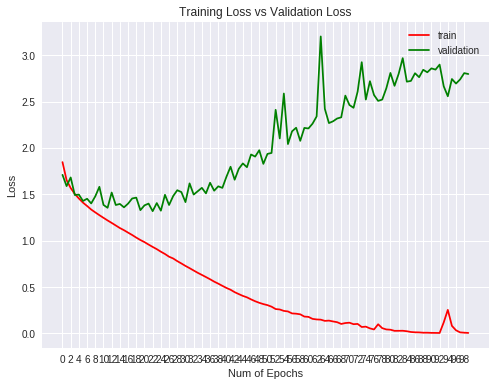

batch: 32  epoch: 100 LEARN: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_332 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_333 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_334 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_335 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 20s 396us/step - loss: 1.8873 - acc: 0.3171 - val_loss: 1.9349 - val_acc: 0.3131
Epoch 2/100
50000/50000 [================

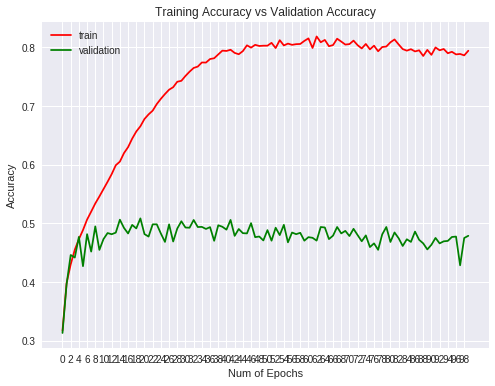

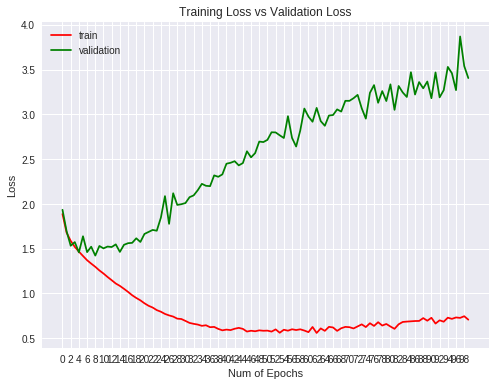

batch: 64  epoch: 100 LEARN: 0.001
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_336 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_337 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_338 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_339 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 269us/step - loss: 2.1531 - acc: 0.2345 - val_loss: 2.0474 - val_acc: 0.2726
Epoch 2/100
50000/50000 [==============

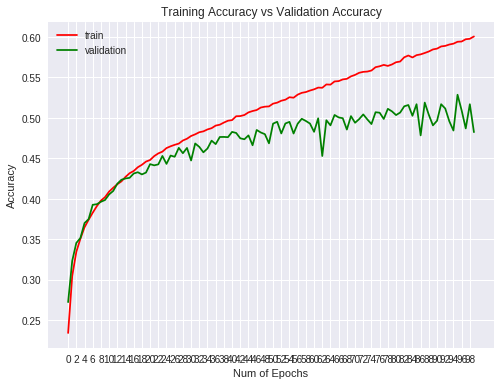

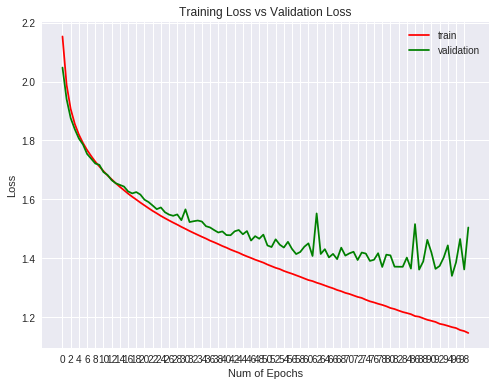

batch: 64  epoch: 100 LEARN: 0.01
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_340 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_341 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_342 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_343 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 271us/step - loss: 1.9028 - acc: 0.3234 - val_loss: 1.7481 - val_acc: 0.3912
Epoch 2/100
50000/50000 [===============

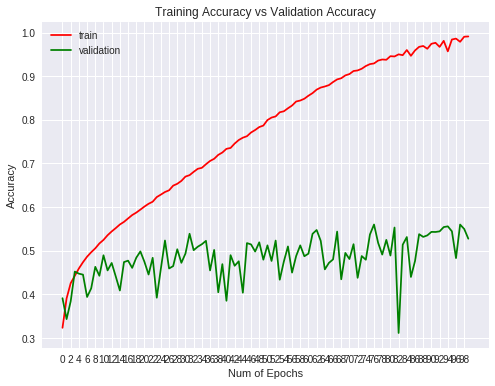

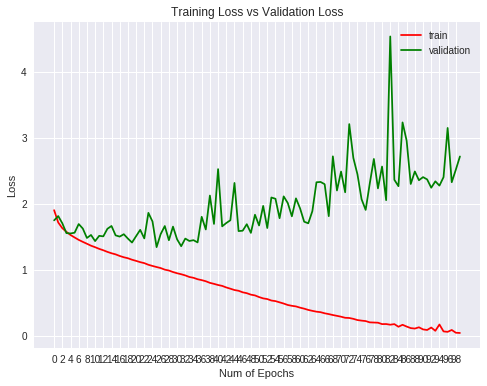

batch: 64  epoch: 100 LEARN: 0.1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_344 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
dense_345 (Dense)            (None, 512)               524800    
_________________________________________________________________
dense_346 (Dense)            (None, 512)               262656    
_________________________________________________________________
dense_347 (Dense)            (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100


KeyboardInterrupt: ignored

In [38]:
hyper_scores=[]
learn_rate = [0.001, 0.01, 0.1]
batch_size = [32, 64, 128, 256]
epochs = [50, 100]
for ep in epochs:
    for batch in batch_size:
        for learn in learn_rate:
            print('batch:',batch,' epoch:',ep, 'LEARN:',learn)
            model = Sequential()
            model.add(Dense(1024, activation='relu', input_dim=3072))
            model.add(Dense(512, activation='relu'))
            model.add(Dense(512, activation='relu'))
            #model.add(Dropout(0.6))
            model.add(Dense(10, activation='softmax'))
            model.compile(loss='categorical_crossentropy',
                      optimizer=SGD(lr=learn),
                      metrics=['accuracy'])
            model.summary()
            history = model.fit(X_train,y_train,
                            batch_size=batch,
                            epochs=ep,
                            verbose=1,
                            validation_data=(X_test, y_test))
            score = model.evaluate(X_test, y_test, verbose=0)
            hyper_scores.append(score)
            hyper_scores.append([score[0],score[1]])
            print('Test loss:', score[0])
            print('Test accuracy:', score[1])
            print('batch:',batch,' epoch:',ep)
            plt.figure(0)
            plt.plot(history.history['acc'],'r')
            plt.plot(history.history['val_acc'],'g')
            plt.xticks(np.arange(0, ep, 2.0))
            plt.rcParams['figure.figsize'] = (8, 6)
            plt.xlabel("Num of Epochs")
            plt.ylabel("Accuracy")
            plt.title("Training Accuracy vs Validation Accuracy")
            plt.legend(['train','validation'])

            plt.figure(1)
            plt.plot(history.history['loss'],'r')
            plt.plot(history.history['val_loss'],'g')
            plt.xticks(np.arange(0, ep, 2.0))
            plt.rcParams['figure.figsize'] = (8, 6)
            plt.xlabel("Num of Epochs")
            plt.ylabel("Loss")
            plt.title("Training Loss vs Validation Loss")
            plt.legend(['train','validation'])

            plt.show()



**Learning rate and Epochs**

batch: 32  epoch: 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_37 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_38 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_39 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 14s 275us/step - loss: 1.8410 - acc: 0.3405 - val_loss: 1.6941 - val_acc: 0.3934
Epoch 2/50
50000/50000 [==============================

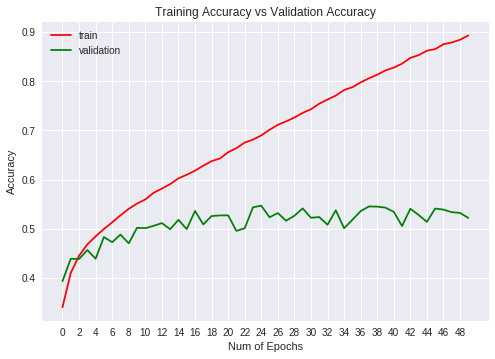

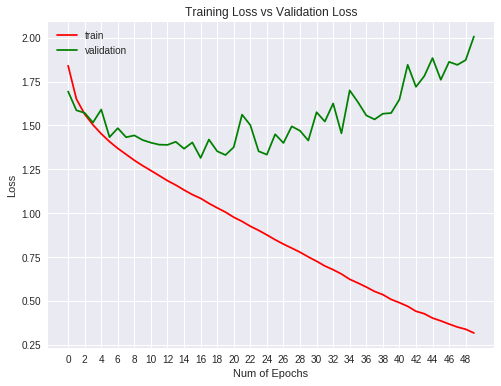

batch: 64  epoch: 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_40 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_41 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_42 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_43 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.9105 - acc: 0.3185 - val_loss: 1.8661 - val_acc: 0.3153
Epoch 2/50
50000/50000 [==============================]

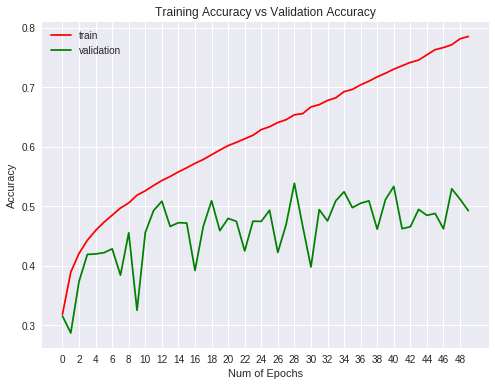

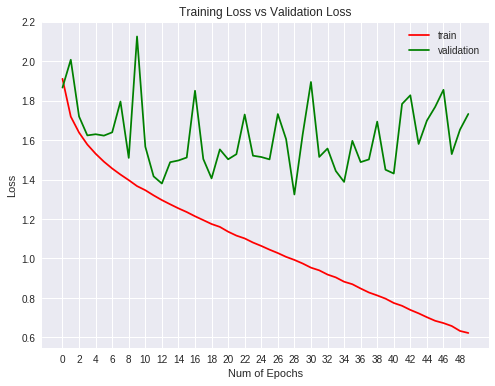

batch: 128  epoch: 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_45 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_46 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_47 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 5s 91us/step - loss: 1.9675 - acc: 0.2984 - val_loss: 1.8539 - val_acc: 0.3344
Epoch 2/50
50000/50000 [==============================]

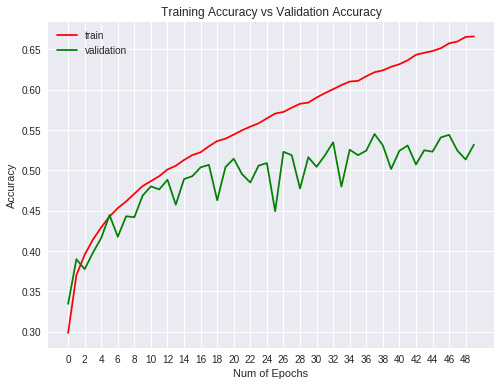

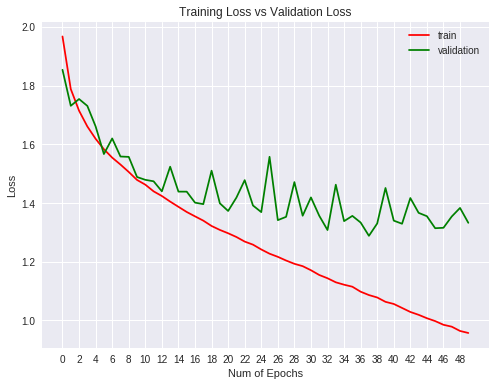

batch: 256  epoch: 50
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_48 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_49 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 55us/step - loss: 2.0370 - acc: 0.2808 - val_loss: 1.9100 - val_acc: 0.3270
Epoch 2/50
50000/50000 [==============================]

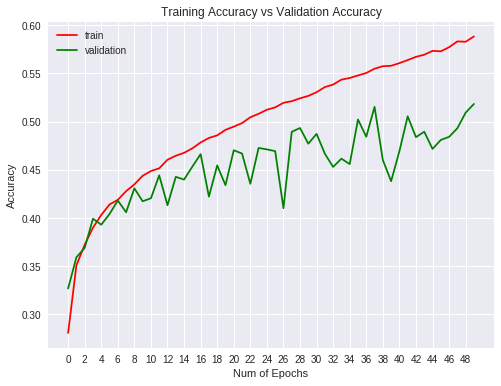

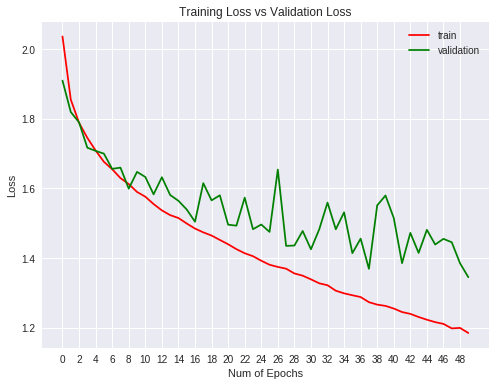

batch: 32  epoch: 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_53 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_54 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_55 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 12s 240us/step - loss: 1.8458 - acc: 0.3405 - val_loss: 1.6911 - val_acc: 0.3920
Epoch 2/100
50000/50000 [===========================

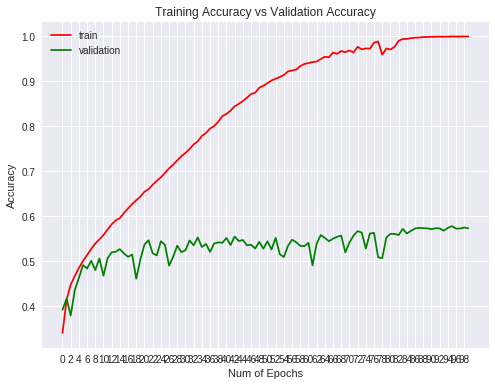

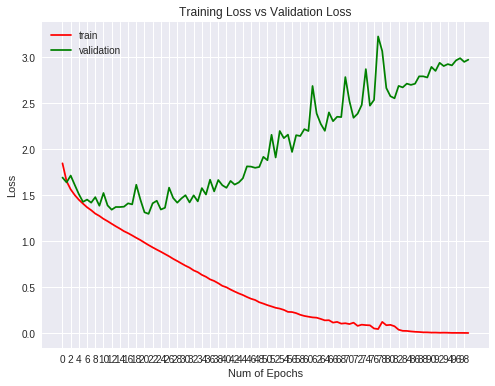

batch: 64  epoch: 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_57 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_58 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_59 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 139us/step - loss: 1.9089 - acc: 0.3165 - val_loss: 1.8849 - val_acc: 0.3300
Epoch 2/100
50000/50000 [============================

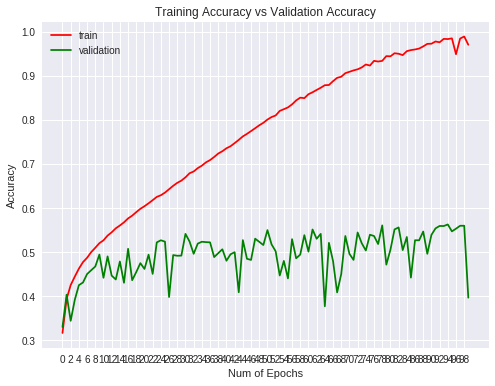

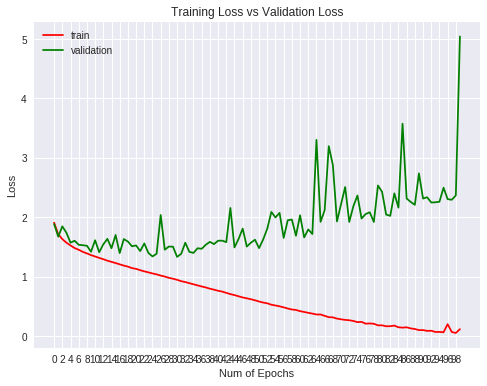

batch: 128  epoch: 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_60 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_61 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_62 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_63 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 4s 88us/step - loss: 1.9699 - acc: 0.3007 - val_loss: 1.8308 - val_acc: 0.3461
Epoch 2/100
50000/50000 [============================

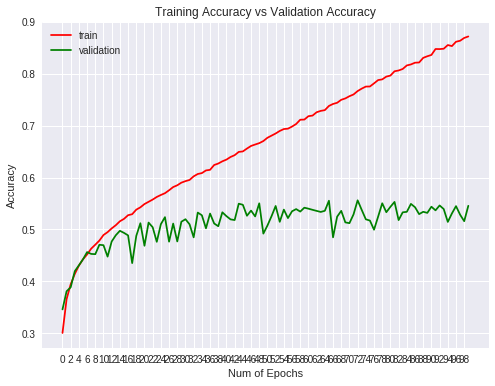

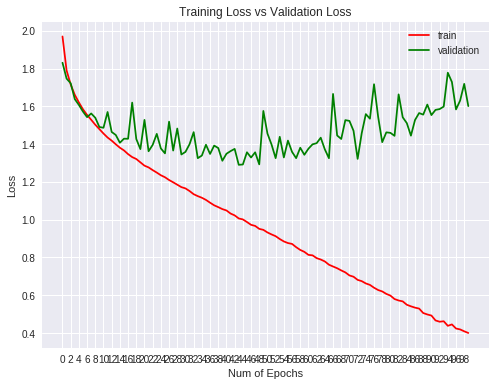

batch: 256  epoch: 100
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 1024)              3146752   
_________________________________________________________________
dense_65 (Dense)             (None, 512)               524800    
_________________________________________________________________
dense_66 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_67 (Dense)             (None, 10)                5130      
Total params: 3,939,338
Trainable params: 3,939,338
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 3s 60us/step - loss: 2.0556 - acc: 0.2758 - val_loss: 1.9557 - val_acc: 0.2946
Epoch 2/100
50000/50000 [============================

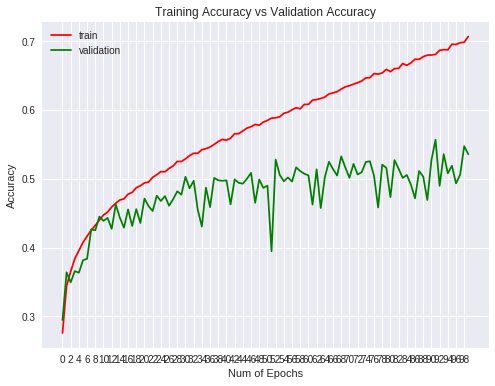

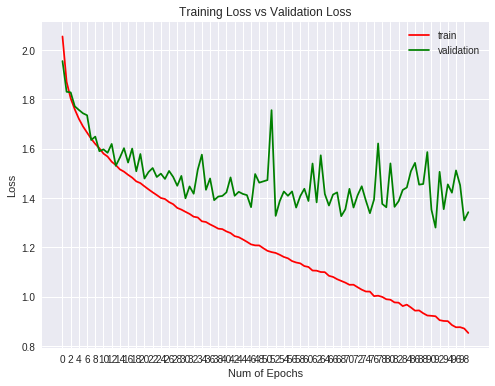

In [11]:
hyper_scores=[]
learn_rate = [0.001, 0.01, 0.1]
batch_size = [32, 64, 128, 256]
epochs = [50, 100]
for ep in epochs:
    for batch in batch_size:
        print('batch:',batch,' epoch:',ep)
        model = Sequential()
        model.add(Dense(1024, activation='relu', input_dim=3072))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(512, activation='relu'))
        #model.add(Dropout(0.6))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(),
                  metrics=['accuracy'])
        model.summary()
        history = model.fit(X_train,y_train,
                        batch_size=batch,
                        epochs=ep,
                        verbose=1,
                        validation_data=(X_test, y_test))
        score = model.evaluate(X_test, y_test, verbose=0)
        hyper_scores.append(score)
        hyper_scores.append([score[0],score[1]])
        print('Test loss:', score[0])
        print('Test accuracy:', score[1])
#         plt.plot(history.history['val_acc'])
#     print('epoch:',ep)
#     #plt.figure(figsize=(8,3))
#     plt.title('vall_acc')
#     plt.ylabel('model_acc')
#     plt.xlabel('epoch')
#     plt.legend(['32', '64', '128','256'], loc='upper left')
#     plt.show()
        print('batch:',batch,' epoch:',ep)
        plt.figure(0)
        plt.plot(history.history['acc'],'r')
        plt.plot(history.history['val_acc'],'g')
        plt.xticks(np.arange(0, ep, 2.0))
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.xlabel("Num of Epochs")
        plt.ylabel("Accuracy")
        plt.title("Training Accuracy vs Validation Accuracy")
        plt.legend(['train','validation'])

        plt.figure(1)
        plt.plot(history.history['loss'],'r')
        plt.plot(history.history['val_loss'],'g')
        plt.xticks(np.arange(0, ep, 2.0))
        plt.rcParams['figure.figsize'] = (8, 6)
        plt.xlabel("Num of Epochs")
        plt.ylabel("Loss")
        plt.title("Training Loss vs Validation Loss")
        plt.legend(['train','validation'])

        plt.show()




**Simple Tune learning rate for Adam**


-------------------START MODEL-----------------------------------
learn: 0.001
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 20s 407us/step - loss: 1.8616 - acc: 0.3232 - val_loss: 1.7049 - val_acc: 0.3818
Epoch 2/15
50000/50000 [==============================] - 18s 367us/step - loss: 1.6787 - acc: 0.3935 - val_loss: 1.5997 - val_acc: 0.4290
Epoch 3/15
50000/50000 [==============================] - 18s 364us/step - loss: 1.5973 - acc: 0.4242 - val_loss: 1.6437 - val_acc: 0.4132
Epoch 4/15
50000/50000 [==============================] - 18s 365us/step - loss: 1.5463 - acc: 0.4455 - val_loss: 1.5836 - val_acc: 0.4298
Epoch 5/15
50000/50000 [==============================] - 18s 365us/step - loss: 1.5053 - acc: 0.4579 - val_loss: 1.5657 - val_acc: 0.4403
Epoch 6/15
50000/50000 [==============================] - 18s 365us/step - loss: 1.4641 - acc: 0.4758 - val_loss: 1.4994 - val_acc: 0.4688
Epoch 7/15
50000/50000 [=============

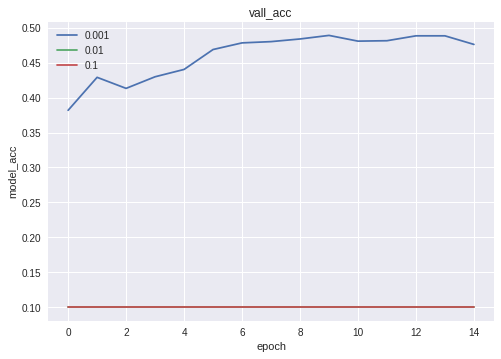

In [8]:

learn_rate = [0.001, 0.01, 0.1]

hyper_scores1=[]
from keras.optimizers import SGD,Adam


for learn in learn_rate:
    
      print('-------------------START MODEL-----------------------------------')
      print('learn:',learn)
      model = Sequential()
      model.add(Dense(1024, activation='relu', input_dim=3072))
      model.add(Dense(512, activation='relu'))
      model.add(Dense(512, activation='relu'))
      #model.add(Dropout(0.6))
      model.add(Dense(10, activation='softmax'))
      model.compile(loss='categorical_crossentropy',
                optimizer=Adam(lr=learn),
                metrics=['accuracy'])
      history = model.fit(X_train,y_train,
                      batch_size=32,
                      epochs=15,
                      verbose=1,
                      validation_data=(X_test, y_test))
      score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
      hyper_scores1.append(score)
      print('scores',score)

      plt.plot(history.history['val_acc'])
#plt.figure(figsize=(20,10))      
plt.title('vall_acc')
plt.ylabel('model_acc')
plt.xlabel('epoch')
plt.legend(['0.001','0.01','0.1'], loc='upper left')
plt.show()

**Learning rate and momentum for SGD**

-------------------START MODEL-----------------------------------
learn: 0.001  mom: 0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 22s 445us/step - loss: 2.0620 - acc: 0.2742 - val_loss: 1.9329 - val_acc: 0.3136
Epoch 2/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.8706 - acc: 0.3477 - val_loss: 1.8276 - val_acc: 0.3701
Epoch 3/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.7990 - acc: 0.3723 - val_loss: 1.7917 - val_acc: 0.3641
Epoch 4/15
50000/50000 [==============================] - 15s 306us/step - loss: 1.7517 - acc: 0.3868 - val_loss: 1.7375 - val_acc: 0.3903
Epoch 5/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.7150 - acc: 0.4015 - val_loss: 1.7114 - val_acc: 0.4000
Epoch 6/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.6838 - acc: 0.4116 - val_loss: 1.7020 - val_acc: 0.3996
Epoch 7/15
50000/50000 [===

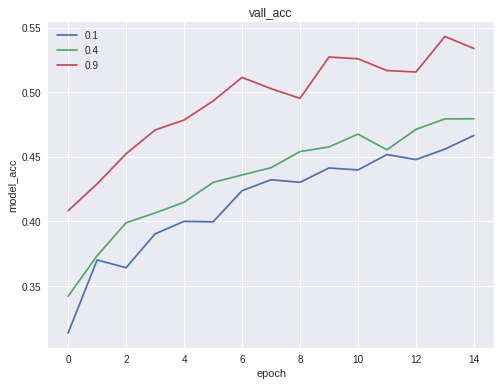

-------------------START MODEL-----------------------------------
learn: 0.01  mom: 0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 460us/step - loss: 1.8428 - acc: 0.3399 - val_loss: 1.7061 - val_acc: 0.4045
Epoch 2/15
50000/50000 [==============================] - 15s 310us/step - loss: 1.6425 - acc: 0.4188 - val_loss: 1.5907 - val_acc: 0.4329
Epoch 3/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.5555 - acc: 0.4486 - val_loss: 1.6002 - val_acc: 0.4221
Epoch 4/15
50000/50000 [==============================] - 16s 312us/step - loss: 1.4955 - acc: 0.4686 - val_loss: 1.5419 - val_acc: 0.4463
Epoch 5/15
50000/50000 [==============================] - 15s 307us/step - loss: 1.4447 - acc: 0.4881 - val_loss: 1.4628 - val_acc: 0.4818
Epoch 6/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.4024 - acc: 0.5021 - val_loss: 1.4333 - val_acc: 0.4804
Epoch 7/15
50000/50000 [====

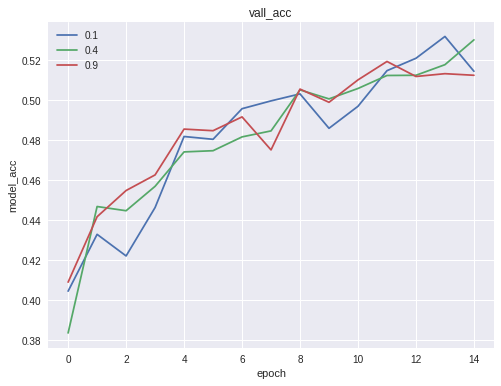

-------------------START MODEL-----------------------------------
learn: 0.1  mom: 0.1
Train on 50000 samples, validate on 10000 samples
Epoch 1/15
50000/50000 [==============================] - 23s 467us/step - loss: 1.9018 - acc: 0.3086 - val_loss: 1.8034 - val_acc: 0.3453
Epoch 2/15
50000/50000 [==============================] - 16s 311us/step - loss: 1.6932 - acc: 0.3906 - val_loss: 1.6809 - val_acc: 0.3878
Epoch 3/15
50000/50000 [==============================] - 15s 309us/step - loss: 1.6026 - acc: 0.4232 - val_loss: 1.7638 - val_acc: 0.3834
Epoch 4/15
50000/50000 [==============================] - 15s 307us/step - loss: 1.5321 - acc: 0.4483 - val_loss: 1.6423 - val_acc: 0.4161
Epoch 5/15
50000/50000 [==============================] - 15s 310us/step - loss: 1.4800 - acc: 0.4682 - val_loss: 1.5158 - val_acc: 0.4553
Epoch 6/15
50000/50000 [==============================] - 15s 308us/step - loss: 1.4324 - acc: 0.4868 - val_loss: 1.4466 - val_acc: 0.4890
Epoch 7/15
50000/50000 [=====

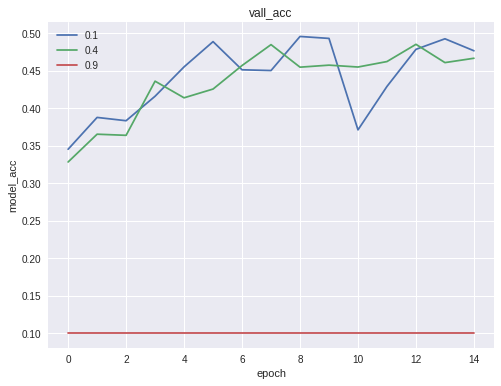

In [44]:
learn_rate = [0.001, 0.01, 0.1]
momentum = [0.1, 0.4, 0.9]

hyper_scores1=[]

##with best epoch,learning rate and best algorithm  WITH BATCH 128

for learn in learn_rate:
    for mom in momentum:
        print('-------------------START MODEL-----------------------------------')
        print('learn:',learn,' mom:',mom)
        model = Sequential()
        model.add(Dense(1024, activation='relu', input_dim=3072))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(512, activation='relu'))
        model.add(Dense(10, activation='softmax'))
        model.compile(loss='categorical_crossentropy',
                  optimizer=SGD(lr=learn, decay=1e-6, momentum=mom, nesterov=True),
                  metrics=['accuracy'])
        history = model.fit(X_train,y_train,
                        batch_size=32,
                        epochs=15,
                        verbose=1,
                        validation_data=(X_test, y_test))
        score = model.evaluate(X_test, y_test, batch_size=128, verbose=0)
        hyper_scores1.append(score)
        
        plt.plot(history.history['val_acc'])
    #plt.figure(figsize=(20,10))
    print('for learn rate',learn)
    plt.title('vall_acc')
    plt.ylabel('model_acc')
    plt.xlabel('epoch')
    plt.legend(['0.1','0.4','0.9'], loc='upper left')
    plt.show()


        
    

##Final models

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_348 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_2 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_32 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_349 (Dense)            (None, 600)               615000    
_________________________________________________________________
dropout_33 (Dropout)         (None, 600)               0         
_________________________________________________________________
dense_350 (Dense)            (None, 10)                6010      
Total params: 3,771,858
Trainable params: 3,769,810
Non-trainable params: 2,048
______________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 30s 605us/step - loss: 1.8346 - acc: 0.3647 - val_loss: 1.8143 - val_acc: 0.3683
Epoch 2/100
50000/50000 [==============================] - 23s 467us/step - loss: 1.6472 - acc: 0.4153 - val_loss: 1.6418 - val_acc: 0.4133
Epoch 3/100
50000/50000 [==============================] - 23s 468us/step - loss: 1.6137 - acc: 0.4251 - val_loss: 1.6355 - val_acc: 0.4296
Epoch 4/100
50000/50000 [==============================] - 23s 467us/step - loss: 1.5746 - acc: 0.4412 - val_loss: 1.5620 - val_acc: 0.4494
Epoch 5/100
50000/50000 [==============================] - 23s 466us/step - loss: 1.5622 - acc: 0.4438 - val_loss: 1.5193 - val_acc: 0.4649
Epoch 6/100
50000/50000 [==============================] - 23s 467us/step - loss: 1.5392 - acc: 0.4533 - val_loss: 1.5482 - val_acc: 0.4488
Epoch 7/100
50000/50000 [==============================] - 23s 465us/step - loss: 1.5210 - acc: 0.4622 - val_l

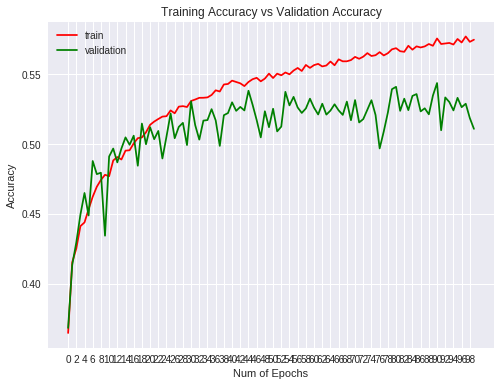

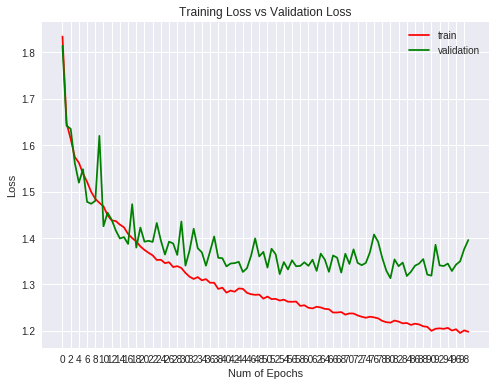

In [39]:
from keras.optimizers import SGD,Adam

from keras.layers.normalization import BatchNormalization


model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(600, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['accuracy'])
model.summary()

# training
history = model.fit(X_train, y_train,
                    batch_size=32,
                    nb_epoch=100,
                    verbose=1,
                    validation_data=(X_test, y_test))

#save_history(history, 'history.txt')

loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', loss)
print('Test acc:', acc)
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 100, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_375 (Dense)            (None, 1024)              3146752   
_________________________________________________________________
batch_normalization_5 (Batch (None, 1024)              4096      
_________________________________________________________________
dropout_40 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_376 (Dense)            (None, 512)               524800    
_________________________________________________________________
dropout_41 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_377 (Dense)            (None, 512)               262656    
_________________________________________________________________
dropout_42 (Dropout)         (None, 512)               0         
__________

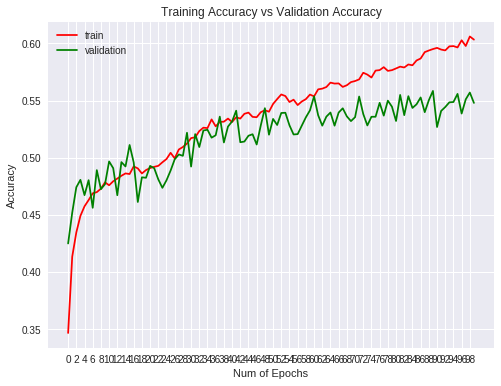

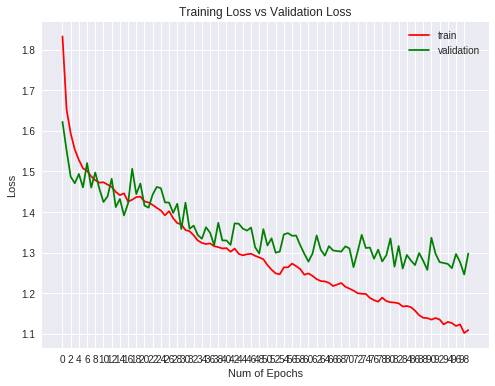

In [43]:
from keras.optimizers import SGD
model = Sequential()
model.add(Dense(1024, activation='relu', input_shape=(3072,)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(lr=0.001, momentum=0.9,nesterov=True),
              metrics=['accuracy'])

history = model.fit(X_train,y_train,
                batch_size=32,
                epochs=100,
                verbose=1,
                validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, 100, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, 100, 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()